In [1]:
!pip install datasets

# Track 1
 [15 points]
Let’s construct a dataset ourselves for with a subset of languages that are roman-script based. The following
are the locales that we want to consider in our dataset [27 languages].

## Down load the data from web

In [2]:
from datasets import load_dataset

dataset = load_dataset("qanastek/MASSIVE")
print(dataset)


## Select the locales required

In [28]:
# Define the list of desired locales
locales = ["af-ZA", "da-DK", "de-DE", "en-US", "es-ES", "fr-FR", "fi-FI", "hu-HU", "is-IS", "it-IT", "jv-ID", "lv-LV", "ms-MY", "nb-NO", "nl-NL", "pl-PL", "pt-PT", "ro-RO", "ru-RU", "sl-SL", "sv-SE", "sq-AL", "sw-KE", "tl-PH", "tr-TR", "vi-VN", "cy-GB"]



In [ ]:
# Filter the dataset to include only the desired locales and columns
filtered_dataset = dataset.filter(lambda example: example['locale'] in locales).map(lambda example: {k: example[k] for k in ['locale', 'partition', 'utt', 'tokens']})


print(filtered_dataset)

## Save the data to text files and save for each locale

In [4]:
from datasets import load_dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the destination folder in Google Drive
drive_folder = '/content/drive/My Drive/assignment_data/dal/assign6/locale_files'  # Change to your desired folder

import os
# Assuming 'drive_folder' is defined as in the previous response

os.makedirs(drive_folder, exist_ok=True)  # Create directories if they don't exist

# Save the dataset to a local file in your Drive
filtered_dataset.save_to_disk(os.path.join(drive_folder,'filtered_data'))

## Saving files locally to gdrive storage

In [ ]:
for locale in locales:
  # Filter the dataset for the current locale
  locale_dataset = filtered_dataset.filter(lambda example: example['locale'] == locale)

  # Extract the utterances and write them to a file
  with open(f"{locale}.txt", "w") as f:
    for example in locale_dataset['train']:
      f.write(example['utt'] + "\n")

# Specify the destination folder in Google Drive
drive_folder = '/content/drive/My Drive/assignment_data/dal/assign6/locale_files'  # Change to your desired folder

import os
# Assuming 'drive_folder' is defined as in the previous response

os.makedirs(drive_folder, exist_ok=True)  # Create directories if they don't exist

# Loop through desired locales and save files
for locale in locales:
  # Construct the full path for the file in Google Drive
  drive_path = f"{drive_folder}/{locale}.txt"

  # Copy the file to Google Drive using the shell command 'cp'
  !cp "{locale}.txt" "{drive_path}"

print("All locale files saved to Google Drive.")

## Mount the drive and read the files again

In [5]:
import datasets
from datasets import load_dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:


# Specify the destination folder in Google Drive
drive_folder = '/content/drive/My Drive/assignment_data/dal/assign6/locale_files'  # Change to your desired folder

import os
# Assuming 'drive_folder' is defined as in the previous response


file_path = '/content/drive/My Drive/assignment_data/dal/assign6/locale_files/filtered_data'  # Same path used for saving

# Load the dataset
loaded_dataset = datasets.load_from_disk(file_path)
print(loaded_dataset)
print(loaded_dataset.shape)
print(loaded_dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['id', 'locale', 'partition', 'scenario', 'intent', 'utt', 'annot_utt', 'tokens', 'ner_tags', 'worker_id', 'slot_method', 'judgments'],
        num_rows: 310878
    })
    validation: Dataset({
        features: ['id', 'locale', 'partition', 'scenario', 'intent', 'utt', 'annot_utt', 'tokens', 'ner_tags', 'worker_id', 'slot_method', 'judgments'],
        num_rows: 54891
    })
    test: Dataset({
        features: ['id', 'locale', 'partition', 'scenario', 'intent', 'utt', 'annot_utt', 'tokens', 'ner_tags', 'worker_id', 'slot_method', 'judgments'],
        num_rows: 80298
    })
})
{'train': (310878, 12), 'validation': (54891, 12), 'test': (80298, 12)}
{'id': '1', 'locale': 'af-ZA', 'partition': 'train', 'scenario': 9, 'intent': 55, 'utt': 'maak my wakker nege-uur v. m. op vrydag', 'annot_utt': 'maak my wakker [time : nege-uur v. m.] op [date : vrydag]', 'tokens': ['maak', 'my', 'wakker', 'nege-uur', 'v.', 'm.', 'op', 'vrydag'], 'ner_t

# Data processing
* convert all words to lower case
* remove all punctuations
* remove all stop words

In [7]:
# remove stopwords (common words like "the", "is", etc.) that do not contribute to the intent classification.
!pip install nltk
import nltk
from nltk.corpus import stopwords
import datasets


In [8]:
!pip install langcodes

In [9]:

import langcodes

language_code = "en"
language_name = langcodes.get(language_code).display_name()
print(language_name)  # Output: English

def get_base_language(locale):
    """
    Extracts the base language name from a locale string.

    Args:
        locale: The locale string (e.g., "en-US", "fr-CA").

    Returns:
        The base language name (e.g., "en", "fr").
    """
    code =  locale.split('-')[0]
    return langcodes.get(code).display_name().lower()

# Example usage
locale = "en-US"
base_language = get_base_language(locale)
print(f"Base language for {locale}: {base_language}")  # Output: Base language for en-US: en

# Example usage
locale = "af-ZA"
base_language = get_base_language(locale)
print(f"Base language for {locale}: {base_language}")  # Output: Base language for en-US: en



English
Base language for en-US: english
Base language for af-ZA: afrikaans


In [10]:
#     Lowercase all text to ensure uniformity, as case differences should not affect classification.
dataset1 = loaded_dataset.map(lambda x: {"utt": x["utt"].lower()})


# Remove punctuation to further simplify the utt, as punctuation usually does not provide information for a multinomial classifier. You can use regular expressions for this task.

import re

def remove_punctuation(utt):
    return re.sub(r'[^\w\s]', '', utt)

dataset2 = dataset1.map(lambda x: {"utt": remove_punctuation(x["utt"])})


In [11]:

print(dataset2.shape)

{'train': (310878, 12), 'validation': (54891, 12), 'test': (80298, 12)}


In [12]:
import nltk
import datasets
import langcodes
from nltk.corpus import stopwords
# Download stopwords resource
nltk.download('stopwords', quiet=True)



def remove_stopwords(example):
  """Removes stopwords from the 'utt' field based on locale."""
  locale = example['locale']
  lang = get_base_language(locale)

  if lang in stopwords.fileids():
    stop_words = set(stopwords.words(lang))
    example['utt'] = ' '.join([word for word in example['utt'].split() if word.lower() not in stop_words])
  return example



# Apply stopword removal to all splits
dataset3 = dataset2.map(remove_stopwords, batched=False, desc="Removing stopwords")

# Print an example to verify
print(dataset3.shape)
print(dataset3['train'][0])

Parameter 'function'=<function remove_stopwords at 0x7f674fdfc9d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Removing stopwords:   0%|          | 0/310878 [00:00<?, ? examples/s]

{'train': (310878, 12), 'validation': (54891, 12), 'test': (80298, 12)}
{'id': '1', 'locale': 'af-ZA', 'partition': 'train', 'scenario': 9, 'intent': 55, 'utt': 'maak my wakker negeuur v m op vrydag', 'annot_utt': 'maak my wakker [time : nege-uur v. m.] op [date : vrydag]', 'tokens': ['maak', 'my', 'wakker', 'nege-uur', 'v.', 'm.', 'op', 'vrydag'], 'ner_tags': [0, 0, 0, 60, 16, 16, 0, 7], 'worker_id': '20', 'slot_method': {'slot': ['time', 'date'], 'method': ['translation', 'translation']}, 'judgments': {'worker_id': ['40', '49', '20'], 'intent_score': [1, 1, 1], 'slots_score': [1, 1, 1], 'grammar_score': [4, 4, 4], 'spelling_score': [2, 2, 2], 'language_identification': ['target', 'target', 'target']}}


In [13]:
dataset3.save_to_disk(os.path.join(drive_folder,'cleaned_data'))


Saving the dataset (0/1 shards):   0%|          | 0/310878 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/54891 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/80298 [00:00<?, ? examples/s]

In [14]:
# file_path = '/content/drive/My Drive/assignment_data/dal/assign6/locale_files/cleaned_data'  # Same path used for saving

# # Load the dataset
# dataset3 = datasets.load_from_disk(file_path)

# Task 2 [15 points]
## Build a multinomial Naive Bayes classifier on your 27 language dataset using the ‘training’ partition of the dataset.



In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine the training and validation datasets for training
train_texts = [example['utt'] for example in dataset3['train']]
train_labels = [example['locale'] for example in dataset3['train']]
val_texts = [example['utt'] for example in dataset3['validation']]
val_labels = [example['locale'] for example in dataset3['validation']]
test_texts = [example['utt'] for example in dataset3['test']]
test_labels = [example['locale'] for example in dataset3['test']]






 ## Finetune the model with the validation partition.

In [ ]:

max_feature_set = [1000,10000,100000,1000000]
accuracy_list = []
for max_feature in max_feature_set:
  vectorizer = CountVectorizer(max_features=max_feature)
  X_train = vectorizer.fit_transform(train_texts)
  X_test = vectorizer.transform(val_texts)


  # Train a Multinomial Naive Bayes classifier
  classifier = MultinomialNB()
  classifier.fit(X_train, train_labels)

  # Predict the labels for the test set
  y_pred = classifier.predict(X_test)

  # Calculate performance metrics for the test set
  accuracy = accuracy_score(test_labels, y_pred)
  accuracy_list.append(accuracy)


## max feature 10000 is choosen as it gives reasonable performance in limited compute time

In [ ]:
# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

## Perfomance metrics is plotted below

In [31]:

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_labels)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate performance metrics for the test set
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print("Test Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Now, let's evaluate the performance on the training
y_train_pred = classifier.predict(vectorizer.transform(train_texts))
# Calculate performance metrics for the train set
accuracy = accuracy_score(train_labels, y_train_pred)
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1 = f1_score(train_labels, y_train_pred, average='weighted')

print("Test Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print("Train Set Performance:")
# Now, let's evaluate the performance on the training
y_val_pred = classifier.predict(vectorizer.transform(val_texts))
# Calculate performance metrics for the val set
accuracy = accuracy_score(val_labels, y_val_pred)
precision = precision_score(val_labels, y_val_pred, average='weighted')
recall = recall_score(val_labels, y_val_pred, average='weighted')
f1 = f1_score(val_labels, y_val_pred, average='weighted')


print("Validation Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Test Set Performance:
Accuracy: 0.8031208747415876
Precision: 0.8879937816312866
Recall: 0.8031208747415876
F1-Score: 0.8312531014433796
Test Set Performance:
Accuracy: 0.8133544348586905
Precision: 0.8935463014041386
Recall: 0.8133544348586905
F1-Score: 0.8399956584319437
Validation Set Performance:
Accuracy: 0.8129565866899856
Precision: 0.8926290598715652
Recall: 0.8129565866899856
F1-Score: 0.8395494848178158


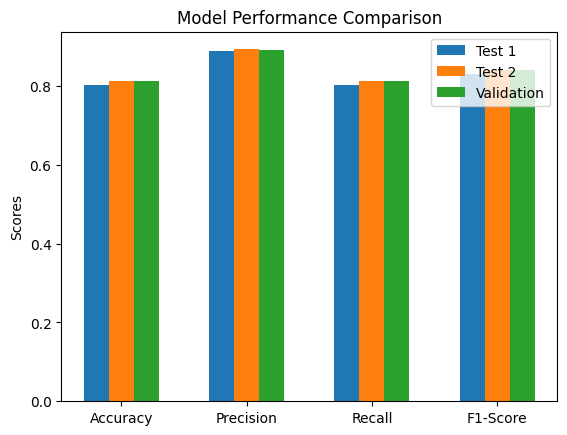

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
test1_scores = [0.8031, 0.8880, 0.8031, 0.8313]  # Rounded for brevity
test2_scores = [0.8134, 0.8935, 0.8134, 0.8400]  # Rounded for brevity
val_scores = [0.8130, 0.8926, 0.8130, 0.840]  # Assuming F1-Score is missing

# Bar positions
x = np.arange(len(metrics))
width = 0.2

# Create bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, test1_scores, width, label='Test 1')
rects2 = ax.bar(x, test2_scores, width, label='Test 2')
rects3 = ax.bar(x + width, val_scores, width, label='Validation')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display plot
plt.show()

# Task 3 [20 points]
Convert further your 27 language dataset into language groups, where the grouping is via their respective
continent names. It appears that the dataset has Asia, Africa, Europe, and North america. So, you will have
four classes now. Collapse the dataset into 4 classes by appending the files into large files.
Build a Regularized Discriminant Analysis (RDA) model, which has a hyper-parameter lambda to tradeoff
between LDA and QDA. You may use bag-of-words via CountVectorizer or Tfidf Vectorizer to create the feature
space of your dataset. It will be a huge feature space, but LDA/QDA can handle large feature spaces, so no

In [ ]:
import pandas as pd
import os

# Define language-continent mapping
language_continent_mapping = {
    "af-ZA": "Africa",
    "da-DK": "Europe",
    "de-DE": "Europe",
    "en-US": "North America",
    "es-ES": "Europe",
    "fr-FR": "Europe",
    "fi-FI": "Europe",
    "hu-HU": "Europe",
    "is-IS": "Europe",
    "it-IT": "Europe",
    "jv-ID": "Asia",
    "lv-LV": "Europe",
    "ms-MY": "Asia",
    "nb-NO": "Europe",
    "nl-NL": "Europe",
    "pl-PL": "Europe",
    "pt-PT": "Europe",
    "ro-RO": "Europe",
    "ru-RU": "Europe",  # Or Asia, depending on your classification
    "sl-SL": "Europe",
    "sv-SE": "Europe",
    "sq-AL": "Europe",
    "sw-KE": "Africa",
    "tl-PH": "Asia",
    "tr-TR": "Europe",  # Or Asia, depending on your classification
    "vi-VN": "Asia",
    "cy-GB": "Europe",
}

# Define output folder
output_folder = "continent_grouped_data"
os.makedirs(output_folder, exist_ok=True)


# Specify the destination folder in Google Drive
drive_folder = '/content/drive/My Drive/assignment_data/dal/assign6/locale_files'  # Change to your desired folder

# Load and group data
for continent in ["Asia", "Africa", "Europe", "North America"]:
    continent_data = []
    for locale, cont in language_continent_mapping.items():
        if cont == continent:
            # Assuming your data is in CSV format, adjust accordingly
            file_path = f"{drive_folder}/{locale}.txt"
            df = pd.read_csv(file_path)
            continent_data.append(df)

    # Concatenate data for the continent
    continent_df = pd.concat(continent_data)

    # Save to a single file
    output_file = os.path.join(output_folder, f"{continent}.csv")
    continent_df.to_csv(output_file, index=False)

print("Data grouped and saved by continent.")

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine the training and validation datasets for training
train_texts = [example['utt'] for example in loaded_dataset['train']]
train_labels = [example['locale'] for example in loaded_dataset['train']]
val_texts = [example['utt'] for example in loaded_dataset['validation']]
val_labels = [example['locale'] for example in loaded_dataset['validation']]
test_texts = [example['utt'] for example in loaded_dataset['test']]
test_labels = [example['locale'] for example in loaded_dataset['test']]




# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [26]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=500)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train.toarray())

# Transform the test data using the fitted PCA object
X_test_pca = pca.transform(X_test.toarray())

print("PCA completed.")
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)


PCA completed.
Shape of X_train_pca: (365769, 500)
Shape of X_test_pca: (80298, 500)


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Create an RDA model (which is essentially a Linear Discriminant Analysis with a regularization parameter)
lda = LinearDiscriminantAnalysis(solver='lsqr')  # Use SVD solver for stability

# Define a range of lambda values to search over for regularization
parameters = {'shrinkage': [0.1, 0.5, 1.0]}  # Adjust the range of lambda values as needed

# Use GridSearchCV to find the best lambda value
# (or other hyperparameter tuning methods you prefer)
clf = GridSearchCV(lda, parameters, scoring='accuracy', cv=5)

# Fit the RDA model using the PCA-reduced features
clf.fit(X_train_pca, train_texts)

# Print the best lambda (or other hyperparameter) value found by GridSearchCV
print("Best reg_param:", clf.best_params_)

# Make predictions on the test set using the best RDA model
y_pred = clf.predict(X_test_pca)

# Calculate performance metrics for the RDA model
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print("RDA Model Test Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Best reg_param: {'shrinkage': 0.1}
RDA Model Test Set Performance:
Accuracy: 0.7511768661735037
Precision: 0.8901527632108871
Recall: 0.7511768661735037
F1-Score: 0.7988950753004384
